In [ ]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2023-12-10 05:07:03--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.206.207, 209.85.200.207, 142.251.171.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.206.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M   119MB/s    in 1.2s    

2023-12-10 05:07:05 (119 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [ ]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

--2023-12-10 05:07:05--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.206.207, 209.85.200.207, 142.251.171.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.206.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘validation-horse-or-human.zip’

validation-horse-or 100%[===================>]  10.95M  --.-KB/s    in 0.1s    

2023-12-10 05:07:05 (90.9 MB/s) - ‘validation-horse-or-human.zip’ saved [11480187/11480187]



In [ ]:
import zipfile
import os

train_zip_dir = "/content/horse-or-human.zip"
val_zip_dir = "/content/validation-horse-or-human.zip"

train_dir = "/content/train"
val_dir = "/content/valid"

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

In [ ]:
with zipfile.ZipFile(train_zip_dir, mode='r') as zip_ref:
  zip_ref.extractall(train_dir)

with zipfile.ZipFile(val_zip_dir, mode='r') as zip_ref:
  zip_ref.extractall(val_dir)

In [ ]:
print(f'total training horse images: {len(os.listdir("/content/train/horses"))}')
print(f'total training human images: {len(os.listdir("/content/train/humans"))}')
print(f'total validation horse images: {len(os.listdir("/content/valid/horses"))}')
print(f'total validation human images: {len(os.listdir("/content/valid/humans"))}')

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255
                                  #  rotation_range=40,
                                  #  width_shift_range=0.2,
                                  #  height_shift_range=0.2,
                                  #  shear_range=0.2,
                                  #  zoom_range=0.2,
                                  #  horizontal_flip=True,
                                  #  fill_mode='nearest'
                                   )

valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(300, 300),
                                                    batch_size=128,
                                                    class_mode='binary')

valid_generator = valid_datagen.flow_from_directory(val_dir,
                                                    target_size=(300, 300),
                                                    batch_size=16,
                                                    class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D, Flatten, Dropout

In [ ]:
model = Sequential([Conv2D(16, (2, 2), activation='relu', input_shape=(300, 300, 3)),

                    MaxPooling2D(2, 2),
                    Conv2D(32, (2, 2), activation='relu'),
                    MaxPooling2D(2, 2),
                    Conv2D(32, (2, 2), activation='relu'),
                    MaxPooling2D(2, 2),
                    Conv2D(64, (2, 2), activation='relu'),
                    MaxPooling2D(2, 2),
                    Conv2D(128, (2, 2), activation='relu'),
                    MaxPooling2D(2, 2),
                    Conv2D(256, (2, 2), activation='relu'),
                    MaxPooling2D(2, 2),
                    Flatten(),
                    Dense(512, activation='relu'),

                    Dense(1, activation='sigmoid')
                    ])

In [ ]:
from tensorflow.keras.optimizers import Adam, RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch=8,
                    epochs=20,
                    verbose=1,
                    validation_data = valid_generator,
                    validation_steps=16)

Epoch 1/20
8/8 [==============================] - 11s 1s/step - loss: 0.6859 - accuracy: 0.4994 - val_loss: 0.6784 - val_accuracy: 0.5000
Epoch 2/20
8/8 [==============================] - 8s 1s/step - loss: 0.6632 - accuracy: 0.6670 - val_loss: 0.6602 - val_accuracy: 0.6562
Epoch 3/20
8/8 [==============================] - 8s 959ms/step - loss: 0.6311 - accuracy: 0.8009 - val_loss: 0.6349 - val_accuracy: 0.6914
Epoch 4/20
8/8 [==============================] - 9s 1s/step - loss: 0.5871 - accuracy: 0.7842 - val_loss: 0.6045 - val_accuracy: 0.7383
Epoch 5/20
8/8 [==============================] - 8s 1s/step - loss: 0.5391 - accuracy: 0.7949 - val_loss: 0.5593 - val_accuracy: 0.7891
Epoch 6/20
8/8 [==============================] - 8s 1s/step - loss: 0.4938 - accuracy: 0.7764 - val_loss: 0.5363 - val_accuracy: 0.7539
Epoch 7/20
8/8 [==============================] - 9s 1s/step - loss: 0.4795 - accuracy: 0.7920 - val_loss: 0.5404 - val_accuracy: 0.7461
Epoch 8/20
8/8 [=====================

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  path = "/content/" + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving WhatsApp Image 2022-02-14 at 10.11.07 AM.jpeg to WhatsApp Image 2022-02-14 at 10.11.07 AM (1).jpeg
1/1 [==============================] - 0s 179ms/step
[0.6196105]
WhatsApp Image 2022-02-14 at 10.11.07 AM (1).jpeg is a human


Text(0.5, 1.0, 'Training and validation loss')

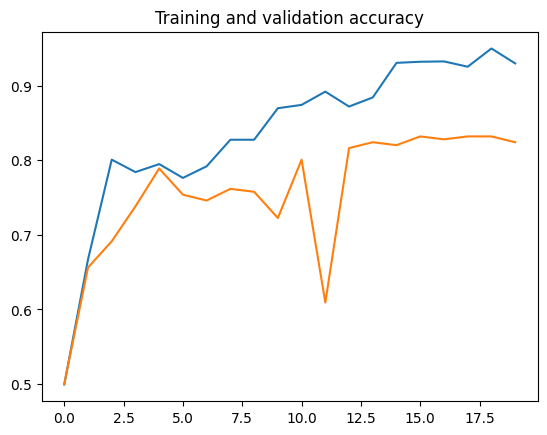

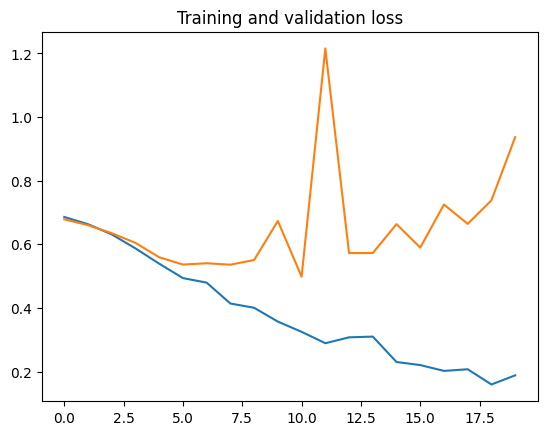

In [ ]:
import matplotlib.pyplot as plt

acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )